# Atividade 2 - análise de dados com Numpy, Pandas e Matplotlib

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Numpy
1. Considere o array 1D a declarado abaixo. Printe o shape dele. Transforme ele em um array 3D no seguinte formato e printe o novo shape:
```python
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
```

2. Considere os arrays a1 e a2 declarados abaixo. Crie um array a3 que é o empilhamento horizontal de a1 e a2:
```python
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]
```
Crie também o array a4 que é o empilhamento vertical de a1 e a2:
```python
[[ 1,  2,  3],
 [ 4,  5,  6],
 [ 7,  8,  9],
 [10, 11, 12]]
```

3. Crie a transposta de a3 e selecione todos elementos da terceira e quarta coluna.
```python
[[ 3,  7],
 [ 6, 10]]
```
4. Selecione os elementos do array a4 que são divisíveis por 2.
5. Calcule a média de cada coluna do array a4.
6. Considere a matriz $X$ e o vetor $y$, armazenadas nos arquivos X.npy e y.npy respectivamente. Faça a leitura desses arquivos. Calcule o vetor $w$ que é dado por: 
$$
w = (X^\top X)^{-1}X^\top y
$$

Relembrando: $X^\top$ é a transposta de $X$ e $X^{-1}$ é a inversa de $X$. Utilizar a multiplicação de matrizes.


In [23]:
a = np.array([x for x in range(27)])
a


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

# Questão 1:

In [24]:
print(a.shape)
a = a.reshape(3, 3 ,3)
print(a)
print(a.shape)

(27,)
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
(3, 3, 3)


In [25]:
a1 = np.array([[1,2,3],
               [4,5,6]])

a2 = np.array([[7,8,9],
               [10,11,12]])


# Questão 2

In [26]:
a3 = np.hstack((a1, a2))
print(f'a3: \n{a3}\n')
a4 = np.vstack((a1, a2))
print(f'a4: \n{a4}\n')

a3: 
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]

a4: 
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]



# Questão 3

In [27]:
Ta4 = np.transpose(a4)
print(f'Ta3: \n{Ta4}\n')
print(f'Ta3 linhas 3 e 4: \n{Ta4[:,2:4]}\n')

Ta3: 
[[ 1  4  7 10]
 [ 2  5  8 11]
 [ 3  6  9 12]]

Ta3 linhas 3 e 4: 
[[ 7 10]
 [ 8 11]
 [ 9 12]]



# Questão 4

In [28]:
D2 = a4[a4%2==0]
print(f'Divisiveis por 2 em a4: \n{D2}\n')

Divisiveis por 2 em a4: 
[ 2  4  6  8 10 12]



# Questão 5

In [29]:
media_colunas = a4.mean(axis=0)
print(f'Media das colunas a4: \n{media_colunas}\n')

Media das colunas a4: 
[5.5 6.5 7.5]



# Questão 6

In [30]:
x = np.load('data\X.npy')
y = np.load('data\y.npy')
d = x.transpose().dot(x)
n = np.linalg.inv(d)
w = n.dot(x.transpose().dot(y))
print(f'Valor de w: \n{w}\n')

Valor de w: 
[[ 1.19709032e+03]
 [-1.56045693e+01]
 [ 5.61262883e+01]
 [-3.91995690e+01]
 [ 1.46953329e+02]
 [ 4.35415783e+04]]



# Pandas

Considere o conjunto de dados de gorjetas, onde as variáveis são:
* total_bill = valor total da conta
* tip = valor da gorjeta
* sex = sexo do cliente
* smoker = se o cliente é fumante
* day = dia da semana
* time = qual refeição
* size = tamanho da mesa

A partir desse conjunto de dados responda utilizando as bibliotecas de análise de dados.

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1. Qual a média, desvio padrão, valores máximos e mínimos de total_bill, tip e size?
1. Qual a quantidade de refeições que ocorreram em cada dia da semana ('day')? E qual a quantidade em cada tipo de refeição ('time')?
1. Crie uma nova coluna chamada percentage que indica a razão entre tip e total_bill. Qual a média, desvio padrão, valores máximos e mínimos dessa nova variável? Retorne a refeição que teve a maior percentage.
1. Qual a média, desvio padrão, valores máximos e mínimos de percentage para clientes do sexo masculino? E para o sexo feminino?
1. Considere os clientes que deram gorjeta cuja porcentagem estava abaixo da média. Quantos são fumantes e quantos são não fumantes?
1. Quais as correlações entre total_bill, tip, size e percentage?
1. Traga alguma informação nova que você julgue interessante sobre esses dados e que ainda não vou abordada nas questões anteriores.

# Questão 1

In [104]:
df['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [102]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [103]:
df['size'].describe()

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

# Questão 2

In [106]:
dias = df.pivot_table(index = ['day'], aggfunc ='size')
dias


day
Fri     19
Sat     87
Sun     76
Thur    62
dtype: int64

In [107]:
horarios = df.pivot_table(index = ['time'], aggfunc ='size')
horarios

time
Dinner    176
Lunch      68
dtype: int64

# Questão 3 

In [34]:
df['percentage'] = df['tip']/df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [35]:
df['percentage'].describe()
df.loc[df['percentage'] == df['percentage'].max()]

,total_bill,tip,sex,smoker,day,time,size,percentage
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


# Questão 4

In [36]:
df_h = df.loc[df['sex'] == 'Male']
df_h

,total_bill,tip,sex,smoker,day,time,size,percentage
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240
6,8.77,2.00,Male,No,Sun,Dinner,2,0.228050
...,...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2,0.079365
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222


In [37]:
df_h.describe()

,total_bill,tip,size,percentage
count,157.000000,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573,0.157651
std,9.246469,1.489102,0.955997,0.064778
min,7.250000,1.000000,1.000000,0.035638
25%,14.000000,2.000000,2.000000,0.121389
50%,18.350000,3.000000,2.000000,0.153492
75%,24.710000,3.760000,3.000000,0.186240
max,50.810000,10.000000,6.000000,0.710345


In [38]:
df_m = df.loc[df['sex'] == 'Female']
df_m

,total_bill,tip,sex,smoker,day,time,size,percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
11,35.26,5.00,Female,No,Sun,Dinner,4,0.141804
14,14.83,3.02,Female,No,Sun,Dinner,2,0.203641
16,10.33,1.67,Female,No,Sun,Dinner,3,0.161665
...,...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2,0.198216
229,22.12,2.88,Female,Yes,Sat,Dinner,2,0.130199
238,35.83,4.67,Female,No,Sat,Dinner,3,0.130338
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584


In [39]:
df_m.describe()

,total_bill,tip,size,percentage
count,87.000000,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770,0.166491
std,8.009209,1.159495,0.937644,0.053632
min,3.070000,1.000000,1.000000,0.056433
25%,12.750000,2.000000,2.000000,0.140416
50%,16.400000,2.750000,2.000000,0.155581
75%,21.520000,3.500000,3.000000,0.194266
max,44.300000,6.500000,6.000000,0.416667


# Questão 5

In [40]:
df_am = df.loc[df['percentage'] < df['percentage'].mean()]
df_am['smoker'].value_counts()

No     85
Yes    52
Name: smoker, dtype: int64

# Questão 6

In [41]:
df[['total_bill','tip','size','percentage']].corr()

,total_bill,tip,size,percentage
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
percentage,-0.338624,0.342370,-0.142860,1.000000


# Questão 7

In [81]:
#clientes do sexo masculino e feminino que frequentaram o restaurante na hora do almoço e pagaram gorjeta.
df_t = df.loc[df['time'] == 'Dinner']
df_t['sex'].value_counts()

Male      124
Female     52
Name: sex, dtype: int64

# Matplotlib e Seaborn
Ainda sobre o dataset da questão anterior crie os seguintes gráficos:
1. Histograma da variável total_bill
2. Scatterplot das variáveis tip e total_bill
3. Gráfico de barras da quantidade de refeições em cada dia da semana
4. Crie uma visualização que traga uma nova informação relevante além daquelas já vistas nos gráficos anteriores

# Questão 1

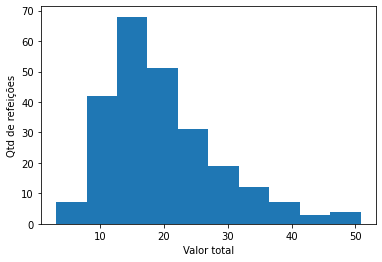

In [53]:
plt.hist(df['total_bill'])
plt.xlabel('Valor total')
plt.ylabel('Qtd de refeições')
plt.show()

# Questão 2

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

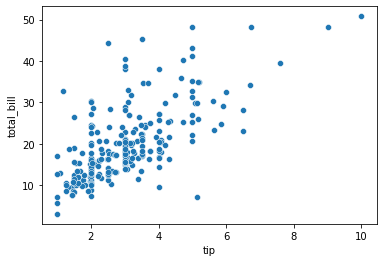

In [68]:
sns.scatterplot(data = df, x= 'tip', y='total_bill')

# Questão 3

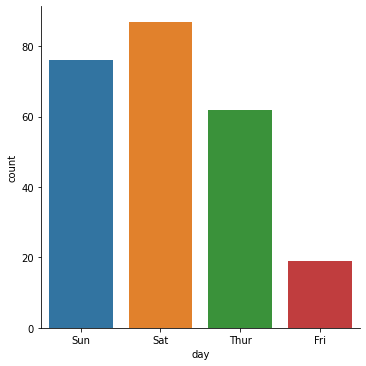

In [79]:
sns.catplot(x = 'day', kind = 'count', data = df)

# Questão 4

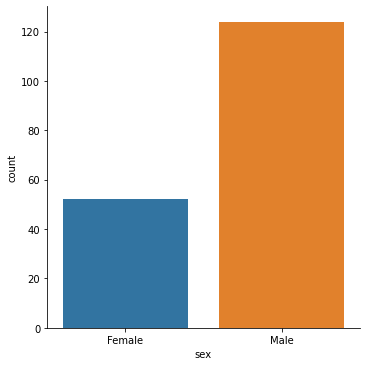

In [83]:
#Grafico da quantidade de homens e mulheres que foram ao restaurante na hora do almoço e pagaram gorjeta.(Questão 7)
sns.catplot(x= 'sex', kind = 'count', data = df_t)